In [1]:
import numpy as np
import nltk
from sklearn.manifold import TSNE
import plotly.express as px
import enchant
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [2]:
#Loading Vector file

file = open("vectors.txt","r")
data = file.read()
rows = data.split("\n")
data = []
file.close()

#Spliting the rows

for row in rows:
    split_row = row.split(" ")
    data.append(split_row)
    
#Removing Numbers from the Vector

for i in range(len(data)):
    try:
        int(data[i][0])
        del data[i]
    except:
        pass

#Removing words with only two letters or less

data = [row for row in data if len(row[0]) > 2]

#Replacing _ by -
#This is needed to identify the english words

for i in range(len(data)):
    data[i][0] = data[i][0].replace("_","-")

#Removing non-english words

d = enchant.Dict("en_US")
data = [row for row in data if d.check(row[0]) == True]

#Keeping only nouns

def check_noun(x):
    tokens = nltk.word_tokenize(x)
    tags = nltk.pos_tag(tokens)
    pos = tags[0][1]
    if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'): return True
    else: return False

data = [row for row in data if check_noun(row[0]) == True]
    
#Removing the words from the Vector and placing in a diferent variable    
   
words =[]
for row in data:
    words.append(row[0])
    row.pop(0)
    
#Coverting the list to a Numpy array
    
for i in range(len(data)):
    data[i] = [float(x) for x in data[i]]
data = np.array(data)
data = np.row_stack(([data[i] for i in range(len(data)-1)]))

In [3]:
n_clusters = 70
sample_size = 5000

In [4]:
tsne = TSNE(n_components=2, perplexity=50.0)
proj = tsne.fit_transform(data[0:sample_size])

In [5]:
kmeans_model = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init=10)
kmeans_model.fit(proj)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=70, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
fig = px.scatter(x = proj[:,0], y = proj[:,1], color=kmeans_model.labels_, hover_name = words[0:sample_size])

fig.show()

In [7]:
#Loading Vocab file

file = open("vocab.txt","r")
vocab = file.read()
rows = vocab.split("\n")
vocab = []
file.close()

#Spliting the rows

for row in rows:
    split_row = row.split(" ")
    vocab.append(split_row)
    
for i in range(len(vocab)-1):
    vocab[i][1] = int(vocab[i][1])
    
#Replacing "_" by ""

for i in range(len(vocab)):
    vocab[i][0] = vocab[i][0].replace("_","")
    
#Replacing "-" by ""

for i in range(len(words)):
    words[i] = words[i].replace("-","")

In [29]:
label = kmeans_model.labels_[words.index("fever")]

In [30]:
def find_freq(x):
    for i in vocab:
        if i[0] == x:
            return i[1]

cloud_words = ''
for word in words[0:sample_size]: 
    if kmeans_model.labels_[words.index(word)] == label:
          for i in range(find_freq(word)):
            cloud_words += word + " "

In [31]:
cloud_words = cloud_words.replace("signs ","")

In [32]:
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations = False,
                min_font_size = 10).generate(cloud_words)

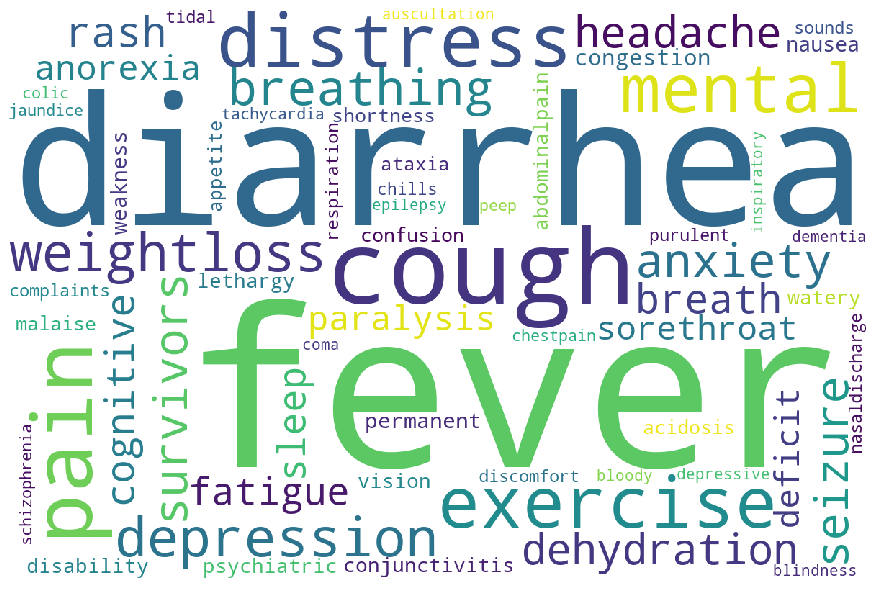

In [33]:
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()